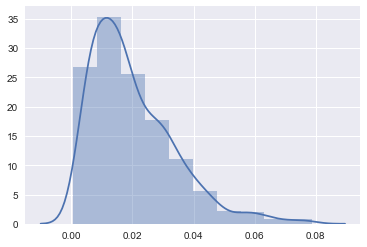

In [91]:
### Testing the theory of order statistics taking normal distribution ####

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

N = 100
trials = 1000
true_mean = 0
true_std = 1

samples = np.random.normal(loc=true_mean, scale=true_std, size=(trials, N))  # rv - X
ord_stats = np.sort(samples, axis=1)  # rv - Z

# sns.distplot(ord_stats[:,10], bins=10)  # pdf of Z

# cdf_samples = norm.cdf(samples[0, :], loc=true_mean, scale=true_std)
# cdf_samples = sm.distributions.empirical_distribution.ECDF(samples[0,:])  
# x = np.linspace(min(samples[0,:]), max(samples[0,:]), num=1000)
# Y = cdf_samples(x)  # rv - F(X)
# plt.plot(x, Y)  # plot of X vs F(X)
# sns.distplot(cdf_samples, bins=10)

# sns.distplot(Y, bins=10)

cdf_ord_stats = norm.cdf(ord_stats[:,1], loc=true_mean, scale=true_std)
# cdf_ord_stats = sm.distributions.empirical_distribution.ECDF(ord_stats[:,0])  
# x = np.linspace(min(ord_stats[:,0]), max(ord_stats[:,0]), num=500)
# y = cdf_ord_stats(x)  # rv - F(Z1)
sns.distplot(cdf_ord_stats, bins=10)
# sns.distplot(y, bins=10)
# plt.plot(x, y)  # plot of F(Z1)



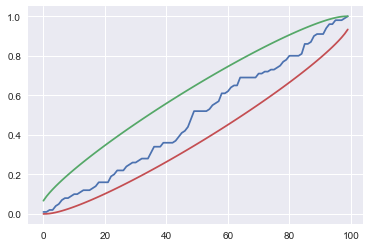

In [104]:
## True doistribution is Normal distribution ##
import numpy as np
from scipy.stats import norm, beta
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


delta = 0.998
N = 100
trials = 1000
true_mean = 0.0
true_std = 1.0
a=1
b=1

# samples = np.random.normal(loc=true_mean, scale=true_std, size=(trials, N))
samples = np.random.beta(a=1, b=1, size=(trials, N))
ord_stats = np.sort(samples, axis=1)

u_limit = np.array([beta.ppf(q=(1+delta)/2.0, a=i, b=N-i+1) for i in range(1, N+1)])
l_limit = np.array([beta.ppf(q=(1-delta)/2.0, a=i, b=N-i+1) for i in range(1, N+1)])

# true_cdf = norm.cdf(ord_stats[0,:], loc=true_mean, scale=true_std)
true_cdf = beta.cdf(ord_stats[0,:], a=1, b=1)
emp_cdf_func = sm.distributions.empirical_distribution.ECDF(ord_stats[0,:])
x = np.linspace(min(ord_stats[0,:]), max(ord_stats[0,:]), num=100)
emp_cdf = emp_cdf_func(x)
# plt.plot(range(100), true_cdf)
plt.plot(range(100), emp_cdf)
plt.plot(range(100), u_limit)
plt.plot(range(100), l_limit)



In [11]:
def mean_integral(N, left, right, cdf_values):
    """
    Computes the mean from cdf of a distribution having positive finite support
    :param N: Number of samples
    :param left: Lower value of the support
    :param right: Upper value of the support
    :param cdf_values: Sorted values of the cdf of a distribution defined on the support [left, right]
    """
    dx = (right - left) / (N * 1.0)
    cdf_integral = 0.0
    
    for i in range(1, N):
        x0 = left + (i-1)*dx
        x1 = left + i*dx
        cdf_x0 = cdf_values[i-1]
        cdf_x1 = cdf_values[i]
        cdf_integral += ((cdf_x0 + cdf_x1)/2.0)*dx
        
    return right - cdf_integral



In [13]:
#### Computation of mean using order statistics #####
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta, truncnorm
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

N = 100
trials = 1000
delta = 0.998
left_support = 10.0
right_support = 20.0
mean = 15.0
std = 1.0

a, b = (left_support - mean) / std, (right_support - mean) / std
samples = truncnorm.rvs(a=a, b=b, loc=mean, scale=std, size=(N,trials))
ord_stats = np.sort(samples)

u_limit = np.array([beta.ppf(q=(1+delta)/2.0, a=i, b=N-i+1) for i in range(1, N+1)])
l_limit = np.array([beta.ppf(q=(1-delta)/2.0, a=i, b=N-i+1) for i in range(1, N+1)])

print "true mean: ", mean
print "upper limit: ", mean_integral(N, left_support, right_support, l_limit)
print "lower limit: ", mean_integral(N, left_support, right_support, u_limit)


true mean:  15.0
upper limit:  16.243166742
lower limit:  13.856833258
